In [103]:
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go


def rotation(theta) :
    
    #Rotation matrix settings chosen according to this paper:
    #--> "Extraction and Tracking of MRI Tagging Sheets Using a 3D Gabor Filter Bank"
    R_xy = np.array([[1,         0,                  0                   ],
                    [0,         np.cos(theta[0]), -np.sin(theta[0]) ],
                    [0,         np.sin(theta[0]), np.cos(theta[0])  ]
                    ])
                 
    R_z = np.array([[np.cos(theta[2]),    -np.sin(theta[2]),    0],
                    [np.sin(theta[2]),    np.cos(theta[2]),     0],
                    [0,                     0,                      1]
                    ])
                     
                     
    R = np.dot(R_z, R_xy )
 
    return R


def gabor_fn(sigma, thetas, Lambda, psi, gamma, size, plot=False, slices=False):
    sigma_x = sigma
    sigma_y = float(sigma) / gamma
    sigma_z = float(sigma) / gamma

    # Bounding box
    (z, y, x) = np.meshgrid(np.arange(-size, size + 1), np.arange(-size, size + 1), np.arange(-size, size +1))
    
    # Rotation
    R = rotation(thetas) 
    z_prime = z * R[0,0] + y * R[0,1] + x * R[0,2]
    y_prime = z * R[1,0] + y * R[1,1] + x * R[1,2]
    x_prime = z * R[2,0] + y * R[2,1] + x * R[2,2]

    gb = np.exp(-.5 * (x_prime ** 2 / sigma_x ** 2 + y_prime ** 2 / sigma_y ** 2 + z_prime ** 2 / sigma_z)) * np.cos(2 * np.pi * x_prime / Lambda + psi)
        
    return gb


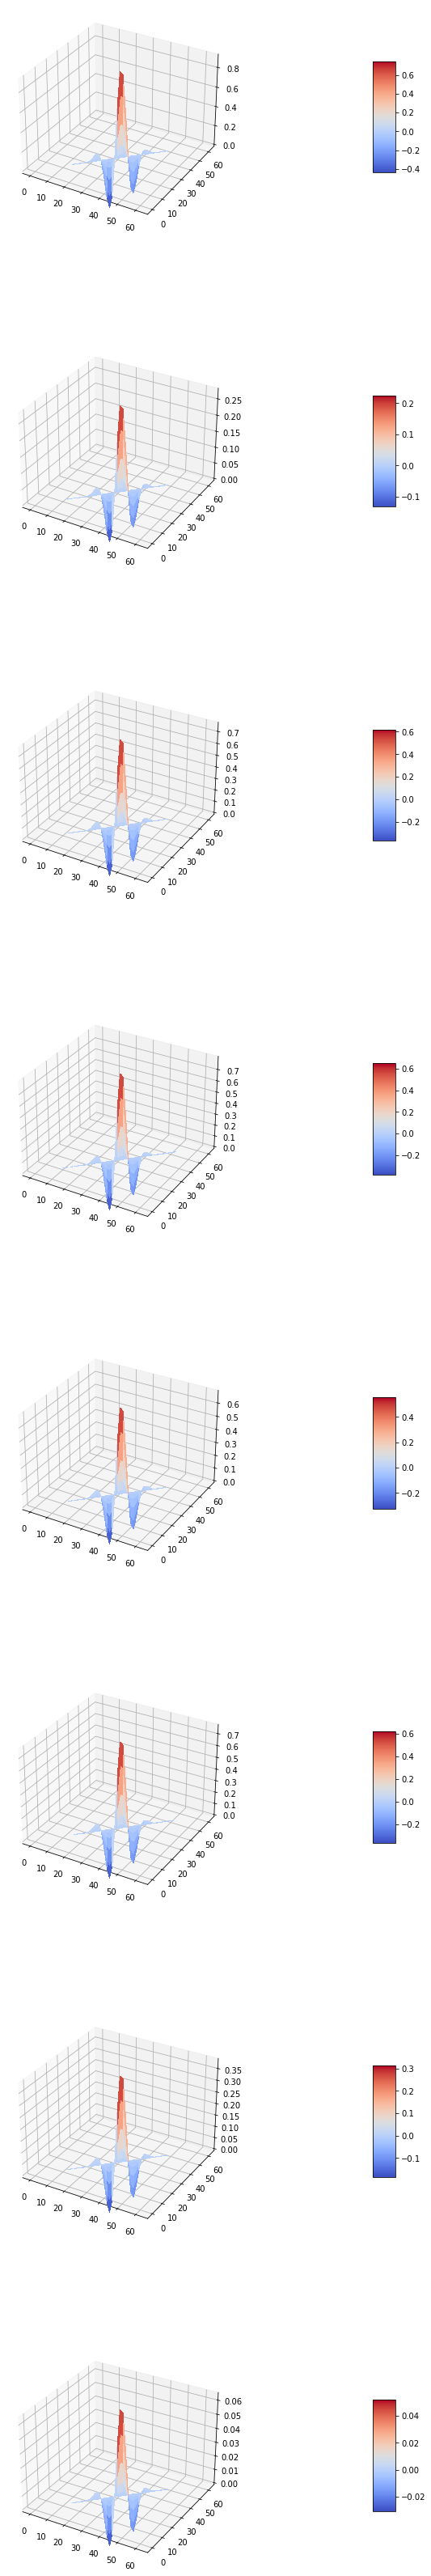

In [106]:
sigma = 4.0
Lambda = 10.0
psi = 0.3
gamma = 0.3
size = 31
theta_x = np.pi
theta_y = np.pi
theta_z = np.pi
thetas = [theta_x, theta_y, theta_z]
kern = gabor_fn(sigma, thetas, Lambda, psi, gamma, size)

#3D plotting
fig = plt.figure()
fig.set_size_inches(50, 50)

total_plots = 0

while True:
    ax = fig.add_subplot(9, 1, total_plots + 1,
                          projection='3d')
    
    slice_ = np.random.randint(low=2, high=kern.shape[2])
  
    # Data for a three-dimensional line
    X = np.arange(0, len(kern))
    Y = X

    # Plot the surface.
    surf = ax.plot_surface(X, Y, kern[slice_], cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(0, np.max(kern[slice_]))
    #ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    #ax.zaxis.set_major_formatter('{x:.02f}')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    total_plots +=1
    
    if total_plots ==8:
        break
    
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()


In [104]:
#Defining Gabor filterbanks:
def filter_bank_gb3d(sigma=4.0, Lambda=10.0, psi=0.3, gamma=0.3, size=31, plot=False):
    filters = []
    sigma = sigma
    for theta_x in np.arange(0, np.pi, np.pi / 4):
        for theta_y in np.arange(0, np.pi, np.pi / 4):
            for theta_z in np.arange(0, np.pi, np.pi / 4):
                thetas = [theta_x, theta_y, theta_z]
                # print(thetas)
                kern = gabor_fn(sigma, thetas, Lambda, psi, gamma, size, plot=plot)
                kern /= 1.5*kern.sum()
                filters.append(np.transpose(kern))
                
    return filters

F = filter_bank_gb3d()

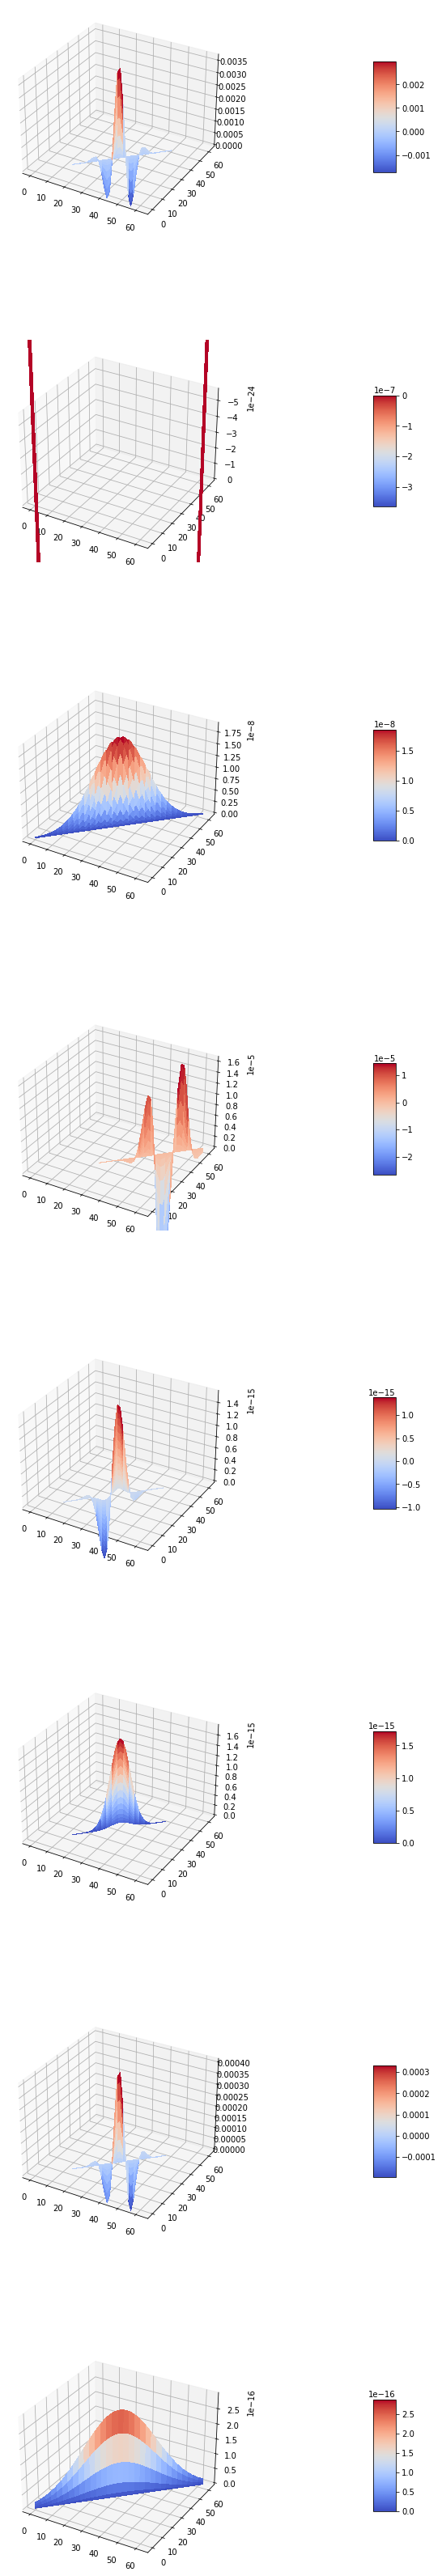

In [105]:
#Watching filters with different orientations
#3D plotting
fig = plt.figure()
fig.set_size_inches(50, 50)

total_plots = 0
np.random.seed(1)

while True:
    ax = fig.add_subplot(9, 1, total_plots + 1,
                          projection='3d')
    
    slice_ = np.random.randint(low=2, high=kern.shape[2])
    orientation_ = np.random.randint(low=2, high=kern.shape[2])
    # Data for a three-dimensional line
    X = np.arange(0, len(kern))
    Y = X

    # Plot the surface.
    surf = ax.plot_surface(X, Y, F[orientation_][slice_], cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(0, np.max(F[orientation_][slice_]))
    #ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    #ax.zaxis.set_major_formatter('{x:.02f}')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    total_plots +=1
    
    if total_plots ==8:
        break
    
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()
